In [112]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import math
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn.tree


##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [113]:
#Please change to your name.
name = "Shikha Thapliyal"

#Please use this to control EDA. 
#show_eda = False

In [114]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
210,0,0.782,0.908,0.520,0.649,0.557,0.385,0.934,0.124,0.229,...,0.697,0.212,0.334,0.402,0.580,0.839,0.872,0.778,0.735,0.779
83,1,0.192,0.657,0.836,0.510,0.040,0.235,0.986,0.664,0.027,...,0.937,0.420,0.427,0.480,0.785,0.412,0.098,0.775,0.220,0.395
91,0,0.846,0.089,0.356,0.501,0.415,0.066,0.622,0.368,0.073,...,0.857,0.150,0.771,0.841,0.519,0.761,0.398,0.832,0.179,0.130
170,1,0.398,0.711,0.156,0.612,0.054,0.734,0.366,0.388,0.761,...,0.459,0.109,0.093,0.780,0.490,0.980,0.839,0.718,0.395,0.360
67,1,0.394,0.261,0.393,0.739,0.659,0.463,0.044,0.262,0.912,...,0.961,0.372,0.498,0.476,0.164,0.173,0.118,0.802,0.882,0.183


**EDA**

In [115]:
import ml_utils

In [116]:
df_eda = ml_utils.edaDF(df,"target")
print(df_eda.giveTarget())

target


In [117]:
df_eda.fullEDA()

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

### Starting

For this assignment, you have a small training set, so combatting overfitting is key in being accurate!

In [ ]:
df.shape

(250, 201)

**NOTE**-------------------
<br>To provide cofiguration to the EDA class for numerical and categorical data. We need to find those variables. The Utitility file
does not provide the name of the variabled in advance therefore defining a function to find the categorical and numerical data

In [ ]:
# Defining a function to find numerical and categorical data in our dataframe
def find_categorical_numerical(df):
    categorical = []
    numerical = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical.append(col)
        else:
            numerical.append(col)
    return categorical, numerical

In [ ]:
# Initializing the function above function by passing our dataframe
categorical, numerical = find_categorical_numerical(df)

In [ ]:
# List of categorical data in our datafrme
print("The Categorical data is: ",categorical)


The Categorical data is:  []


**CATEGORICAL DATA**
<br>The result for the categorical  data is an empty list therefore, there is no categorical data in our data frame.

In [ ]:
# List of numerical data in our dataframe
print("The Numerical data is: ",numerical)


The Numerical data is:  ['target', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var

#### Do Modelling Stuff

Make a tree model (of some vareity) and make it fit well. Keep in mind the possibility of your tree overfitting, and think of steps you may need to combat that shoudl it occur. 

**Creating a pipeline for our dataset**
<br>
A pipeline is a sequence of steps that are executed in order to preprocess, transform and fit a model on a dataset. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline steps
pipe = Pipeline([('scaler', StandardScaler())])

# Fit the pipeline to the DataFrame
pipe.fit(df)

# Transform the DataFrame using the pipeline
df_transformed = pipe.transform(df)

#Split data as normal
#y = np.array(df3["Survived"]).reshape(-1,1)
#X = np.array(df3.drop(columns={"Survived"}))
y_ = df["target"]
X_ = df.drop(columns={"target"})





**Quality of split**
<br>
<br>
**Gini**
<br>
It is the default criteria for measuring the quality of a split that we have in above model.
In above model the gini index is a commonly used measure of impurity in decision tree algorithms. It is used to determine the quality of a split in the tree by measuring the homogeneity of the observations in a particular node.
<br>
By assignind different value for **random_state** in our model we can check for best results.

7
Training Accuracy: 1.0
Testing Accuracy: 0.5714285714285714


[Text(0.4978813559322034, 0.9375, 'var_49 <= 0.567\ngini = 0.497\nsamples = 187\nvalue = [86, 101]\nclass = True'),
 Text(0.288135593220339, 0.8125, 'var_194 <= 0.441\ngini = 0.436\nsamples = 109\nvalue = [35, 74]\nclass = True'),
 Text(0.13559322033898305, 0.6875, 'var_80 <= 0.192\ngini = 0.5\nsamples = 51\nvalue = [26, 25]\nclass = False'),
 Text(0.06779661016949153, 0.5625, 'var_105 <= 0.216\ngini = 0.26\nsamples = 13\nvalue = [2, 11]\nclass = True'),
 Text(0.03389830508474576, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = False'),
 Text(0.1016949152542373, 0.4375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = True'),
 Text(0.2033898305084746, 0.5625, 'var_140 <= 0.933\ngini = 0.465\nsamples = 38\nvalue = [24, 14]\nclass = False'),
 Text(0.1694915254237288, 0.4375, 'var_17 <= 0.171\ngini = 0.397\nsamples = 33\nvalue = [24, 9]\nclass = False'),
 Text(0.13559322033898305, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = True'),
 Text(0.2033898305084746, 0.31

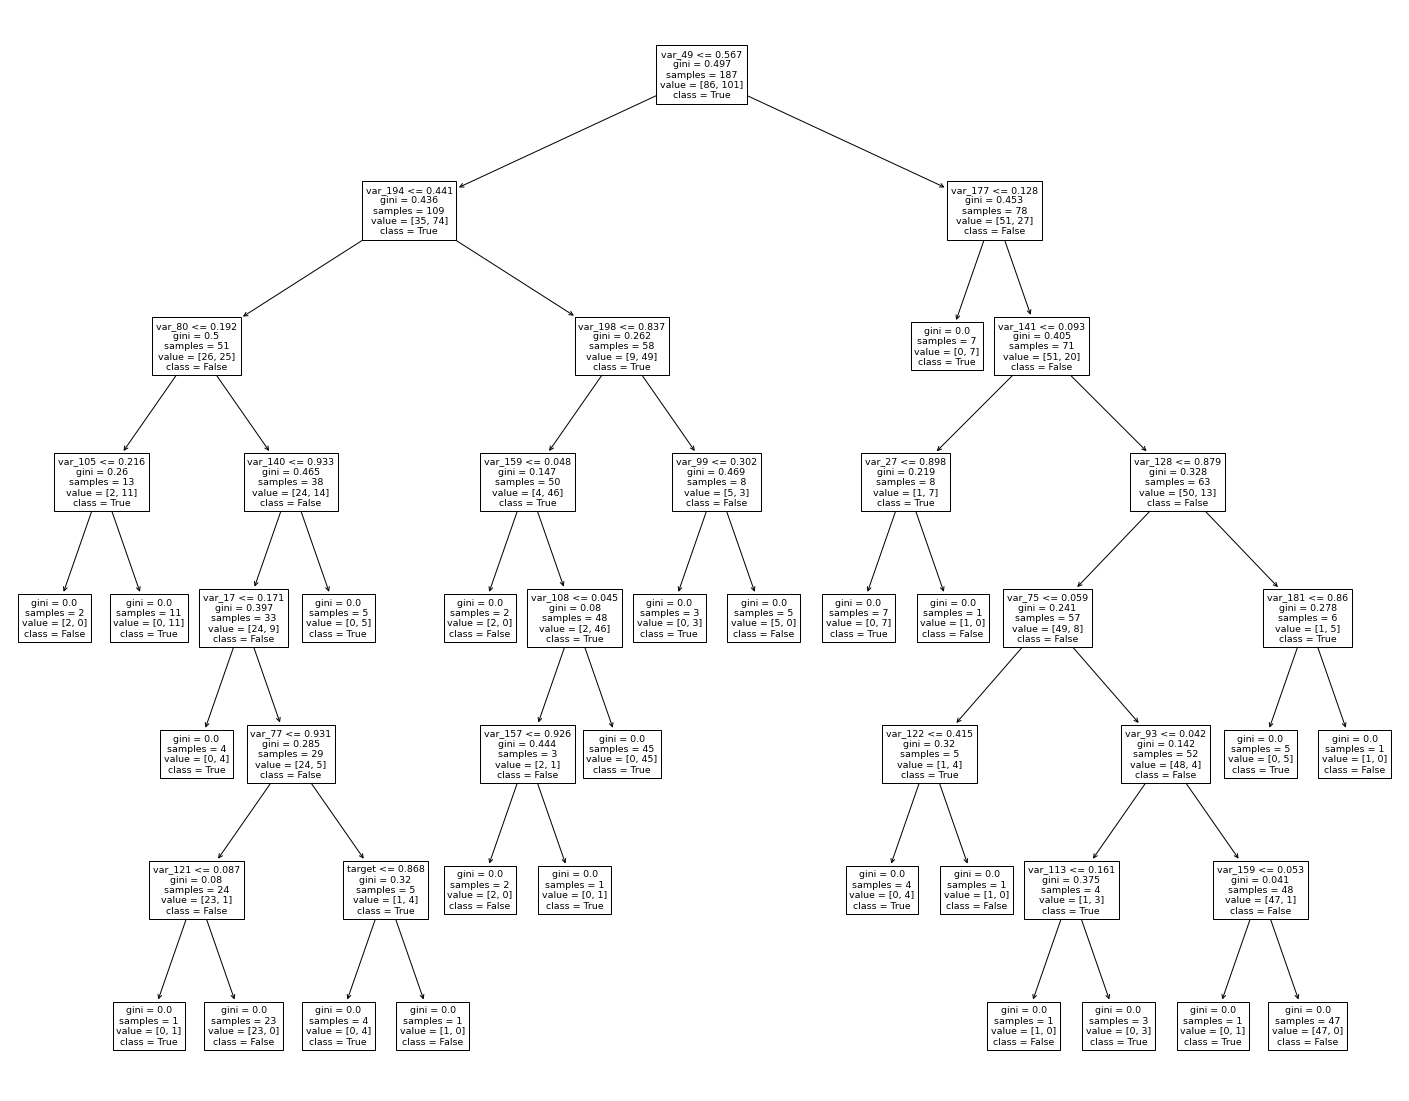

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Trees don't theoretically require dummies, but sklearns implemention does.
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4) # assigning random_state=4

best = DecisionTreeClassifier(random_state=0) # assigning random_state=4
best = best.fit(X_train, y_train)
print(best.get_depth())
print("Training Accuracy:", best.score(X_train, y_train))
print("Testing Accuracy:", best.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(best, feature_names=df.columns[:-1], class_names=["False","True"])

**Entropy**
<br>
It is another commonly used measure of impurity in decision tree algorithms, similar to the gini index.
<br>
The entropy is used as a criterion for classification problems in scikit-learn's DecisionTreeClassifier.
<br>Therefore trying out model with Entropy. For entropy we pass argument criterion as "entropy" with out DecisonTreeClassifier.


7
Training Accuracy: 1.0
Testing Accuracy: 0.4603174603174603


[Text(0.49, 0.9375, 'var_49 <= 0.567\nentropy = 0.995\nsamples = 187\nvalue = [86, 101]\nclass = True'),
 Text(0.28, 0.8125, 'var_194 <= 0.441\nentropy = 0.906\nsamples = 109\nvalue = [35, 74]\nclass = True'),
 Text(0.16, 0.6875, 'var_80 <= 0.192\nentropy = 1.0\nsamples = 51\nvalue = [26, 25]\nclass = False'),
 Text(0.08, 0.5625, 'var_122 <= 0.825\nentropy = 0.619\nsamples = 13\nvalue = [2, 11]\nclass = True'),
 Text(0.04, 0.4375, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = True'),
 Text(0.12, 0.4375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = False'),
 Text(0.24, 0.5625, 'var_25 <= 0.764\nentropy = 0.949\nsamples = 38\nvalue = [24, 14]\nclass = False'),
 Text(0.2, 0.4375, 'var_132 <= 0.456\nentropy = 0.999\nsamples = 27\nvalue = [13, 14]\nclass = True'),
 Text(0.16, 0.3125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = True'),
 Text(0.24, 0.3125, 'var_3 <= 0.266\nentropy = 0.852\nsamples = 18\nvalue = [13, 5]\nclass = False'),
 Text(0.2, 0.1875, 'entropy = 

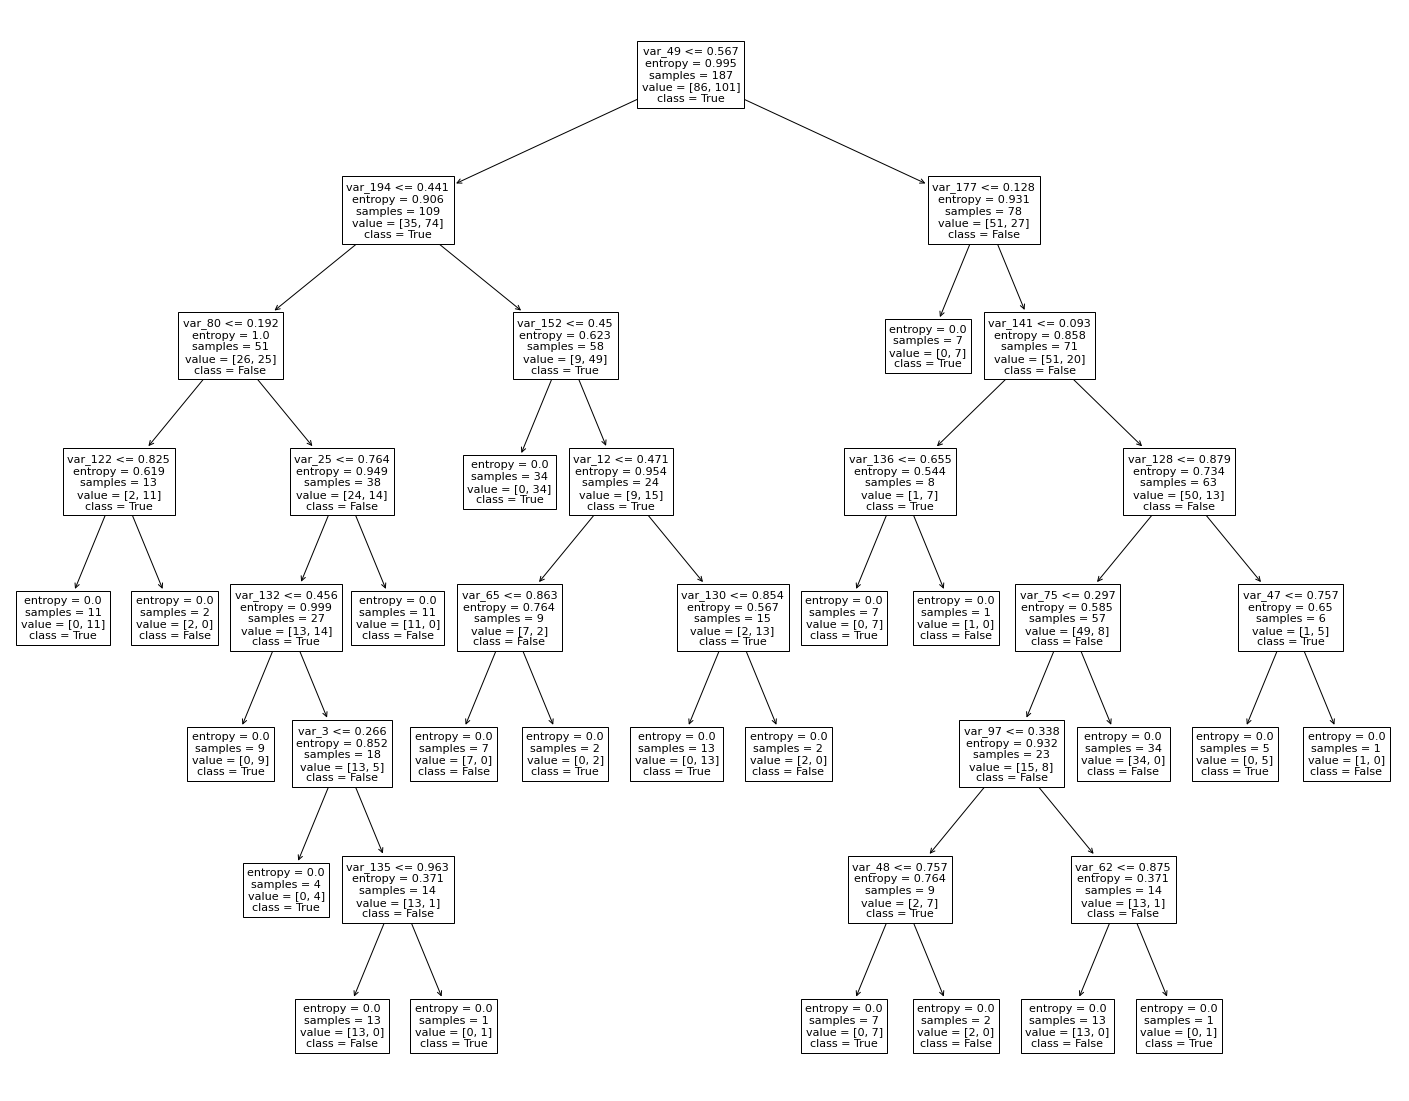

In [ ]:
#Tree with entropy
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])


**Hyperparameter Tuning**

In general, many of the things that you can provide as arguments to create the models are hyperparameters. To improve the quality of our model is to manipulate the set of hyperparameters until we get a model that delivers the best results.
Hyperparameters that can be tuned for decision trees include the maximum depth of the tree here we 


6
Training Accuracy: 0.9679144385026738
Testing Accuracy: 0.5714285714285714


[Text(0.4955357142857143, 0.9285714285714286, 'var_49 <= 0.567\ngini = 0.497\nsamples = 187\nvalue = [86, 101]\nclass = True'),
 Text(0.2857142857142857, 0.7857142857142857, 'var_194 <= 0.441\ngini = 0.436\nsamples = 109\nvalue = [35, 74]\nclass = True'),
 Text(0.14285714285714285, 0.6428571428571429, 'var_80 <= 0.192\ngini = 0.5\nsamples = 51\nvalue = [26, 25]\nclass = False'),
 Text(0.07142857142857142, 0.5, 'var_100 <= 0.856\ngini = 0.26\nsamples = 13\nvalue = [2, 11]\nclass = True'),
 Text(0.03571428571428571, 0.35714285714285715, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = True'),
 Text(0.10714285714285714, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = False'),
 Text(0.21428571428571427, 0.5, 'var_140 <= 0.933\ngini = 0.465\nsamples = 38\nvalue = [24, 14]\nclass = False'),
 Text(0.17857142857142858, 0.35714285714285715, 'var_163 <= 0.118\ngini = 0.397\nsamples = 33\nvalue = [24, 9]\nclass = False'),
 Text(0.14285714285714285, 0.21428571428571427, '

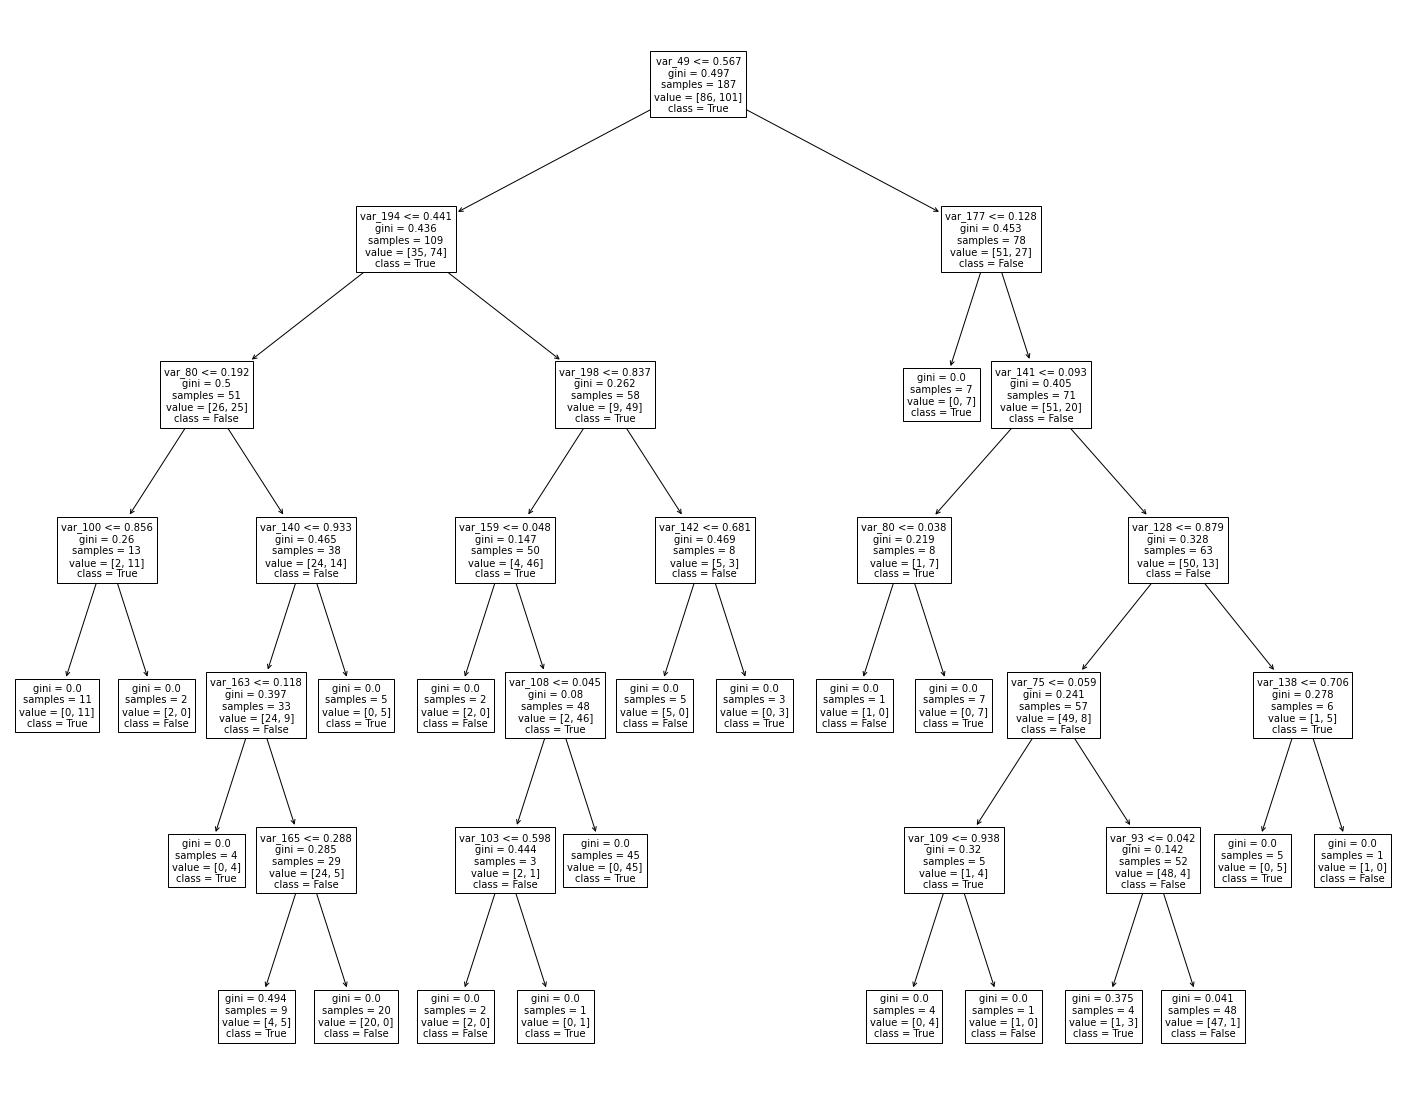

In [ ]:
# HYperparameter tunning ----Setting max depth to 6
clf1 = DecisionTreeClassifier(max_depth=6) 
clf1 = clf1.fit(X_train, y_train)

print(clf1.get_depth())
print("Training Accuracy:", clf1.score(X_train, y_train))
print("Testing Accuracy:", clf1.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf1, feature_names=df.columns[:-1], class_names=["False","True"])


**IMPORTANCE**
In decision tree algorithms, feature importance is a measure of how much a particular feature contributes to the prediction of the target variable. It is used to determine which features are more important in the decision-making process and to identify which features are redundant or not informative.

In [ ]:
importances = best.feature_importances_
feat_imp = pd.Series(importances, index=df2.drop(columns={"target"}).columns)
feat_imp.sort_values(ascending=False)[0:5] 

var_50     0.108374
var_195    0.073476
var_178    0.070779
var_142    0.068327
var_160    0.059043
dtype: float64

We used Gini, Entropy and Hyperparameter Tuning for best results for our tree model:
<br>**Gini**-
<br>
Training Accuracy: 1.0
<br>
Testing Accuracy: 0.5714285714285714
<br>**Entropy**
<br>
Training Accuracy: 1.0
<br>
Testing Accuracy: 0.5238095238095238
<br>**Hyperparameter Tuning**
<br>
Training Accuracy: 0.9786096256684492
<br>
Testing Accuracy: 0.5238095238095238
<br>
<br>Therefore **Gini** is out best model for the tree.


### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [ ]:
print(best.score(X_test, y_test))
print(best)

0.5714285714285714
DecisionTreeClassifier(random_state=0)


### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [ ]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))


FileNotFoundError: [Errno 2] No such file or directory: 'testing.csv'

### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<ul> 
<li>limit the potential for overfitting is to cap the number of levels that the algorithm is allowed to create. 
<br>The model generated will have to seek the most accuracy when limited to X number of decisions.
<li>Tried differnt method for quality of split--**Gini** , **Entropy**, **Hyperameter 
<li>setting depth of the tree by assigning different values to max_depth
<li> Adjusting value for random_state in DecisionTreeClassifier
</ul>